# About the Notebook

In this notebook, I've tried to predict Breast Cancer using 6 different algorithm and evaluated these classification algorithms on my dataset, including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Machine (SVM), Naive Bayes, and Gradient Boosting.


This database is available on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry   
j) fractal dimension ("coastline approximation" - 1)  

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.  

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Notebook libraries Imports

In [2]:
# Standard libraries
import itertools
import warnings


# Data Analysis Libraries
import numpy as np
import pandas as pd


# Visualization Libraries
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
import missingno as msno



# Machine Learning Libraries
import scipy.optimize as opt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, jaccard_score, f1_score, roc_auc_score, confusion_matrix, classification_report, log_loss


# Suppressing warnings for a cleaner output
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading and Reading Breast Cancer Classification Data

In [3]:
BCC_df_raw = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

## Data Cleaning
### Finding Missing Values

In [4]:
# Check if there are any missind vlaues in the entire DataFrame
missing_values = BCC_df_raw .isnull().values.any()
# Counting the missing values in the entire DataFrame 
missing_values_sum = BCC_df_raw.isnull().sum()


print("Are there any missing values:", missing_values)

if missing_values:
    print("Columns with missing values:")
    print(missing_values_sum)


Are there any missing values: True
Columns with missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmet

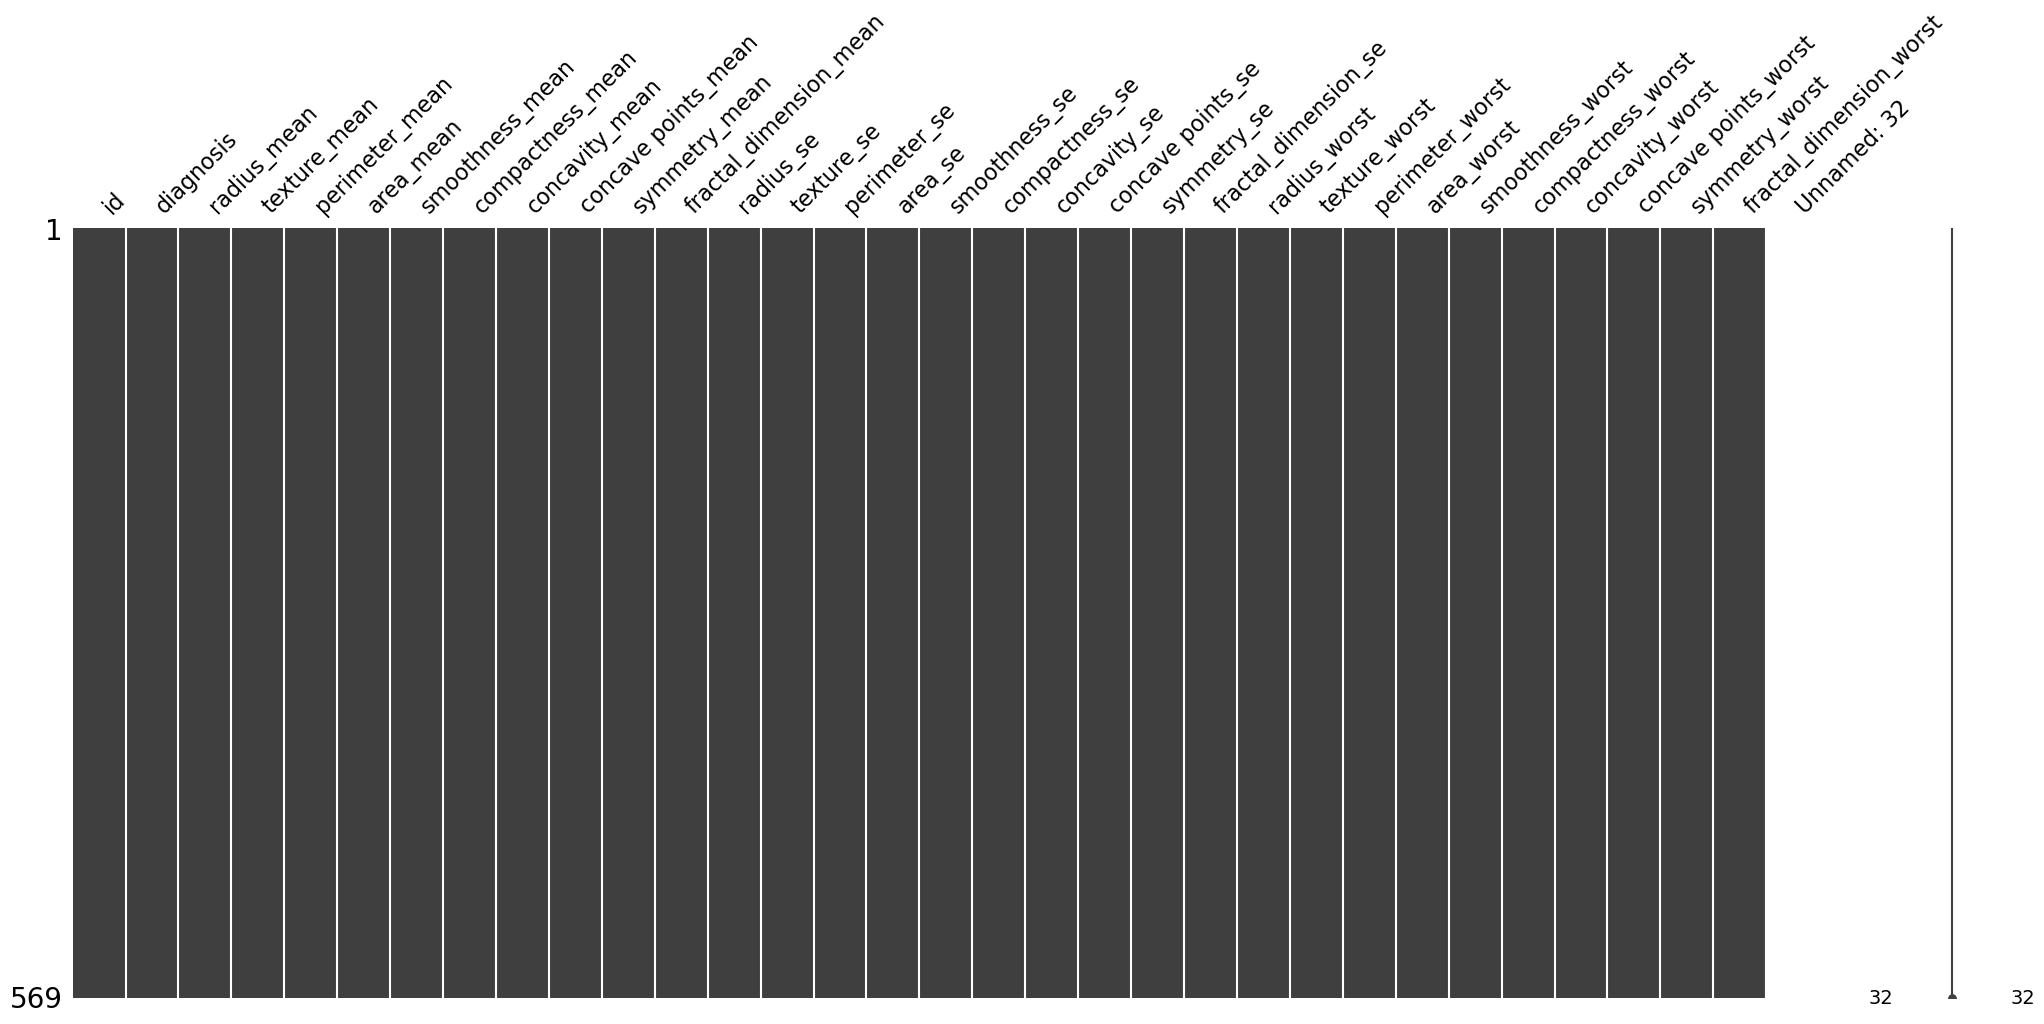

In [5]:
# Visulization of the missing values
msno.matrix(BCC_df_raw)
plt.show()

Column Unnamed: 32 has null values and ID Column has unnecessary values , so we will drop both of them.

In [6]:
# Removing missing and unnecessary values in the dataset
BCC_df_raw.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

## Exploratory Data Analysis
First we take a look at our data.

In [7]:
BCC_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
BCC_df_raw.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
BCC_df_raw.shape

(569, 31)

In [10]:
BCC_df_raw.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#print all the columns of the dataset
BCC_df_raw.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Now we create a bar plot to visualize the distribution of the benign and malignant cases and to get much more about the data's characteristics, which can guide preprocessing steps, model selection, evaluation, and ultimately contribute to making meaningful decisions based on our analysis.

In [12]:
# BCC_df_raw is our DataFrame and 'diagnosis' is the column containing 'B' and 'M' data
counts = BCC_df_raw['diagnosis'].value_counts()

print(counts)

B    357
M    212
Name: diagnosis, dtype: int64


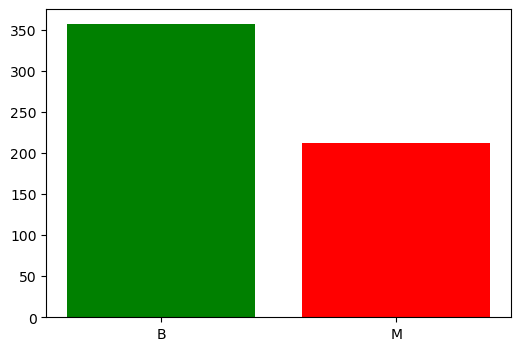

In [13]:
plt.figure(figsize=(6,4))
plt.bar(BCC_df_raw['diagnosis'].value_counts().keys(), BCC_df_raw['diagnosis'].value_counts(), color=('green', 'red'))
plt.show()

## Creating a Heatmap
Now we want to visualize relationships and patterns of our dataset based on diagnosis column. The darker shade represents a high correlation.

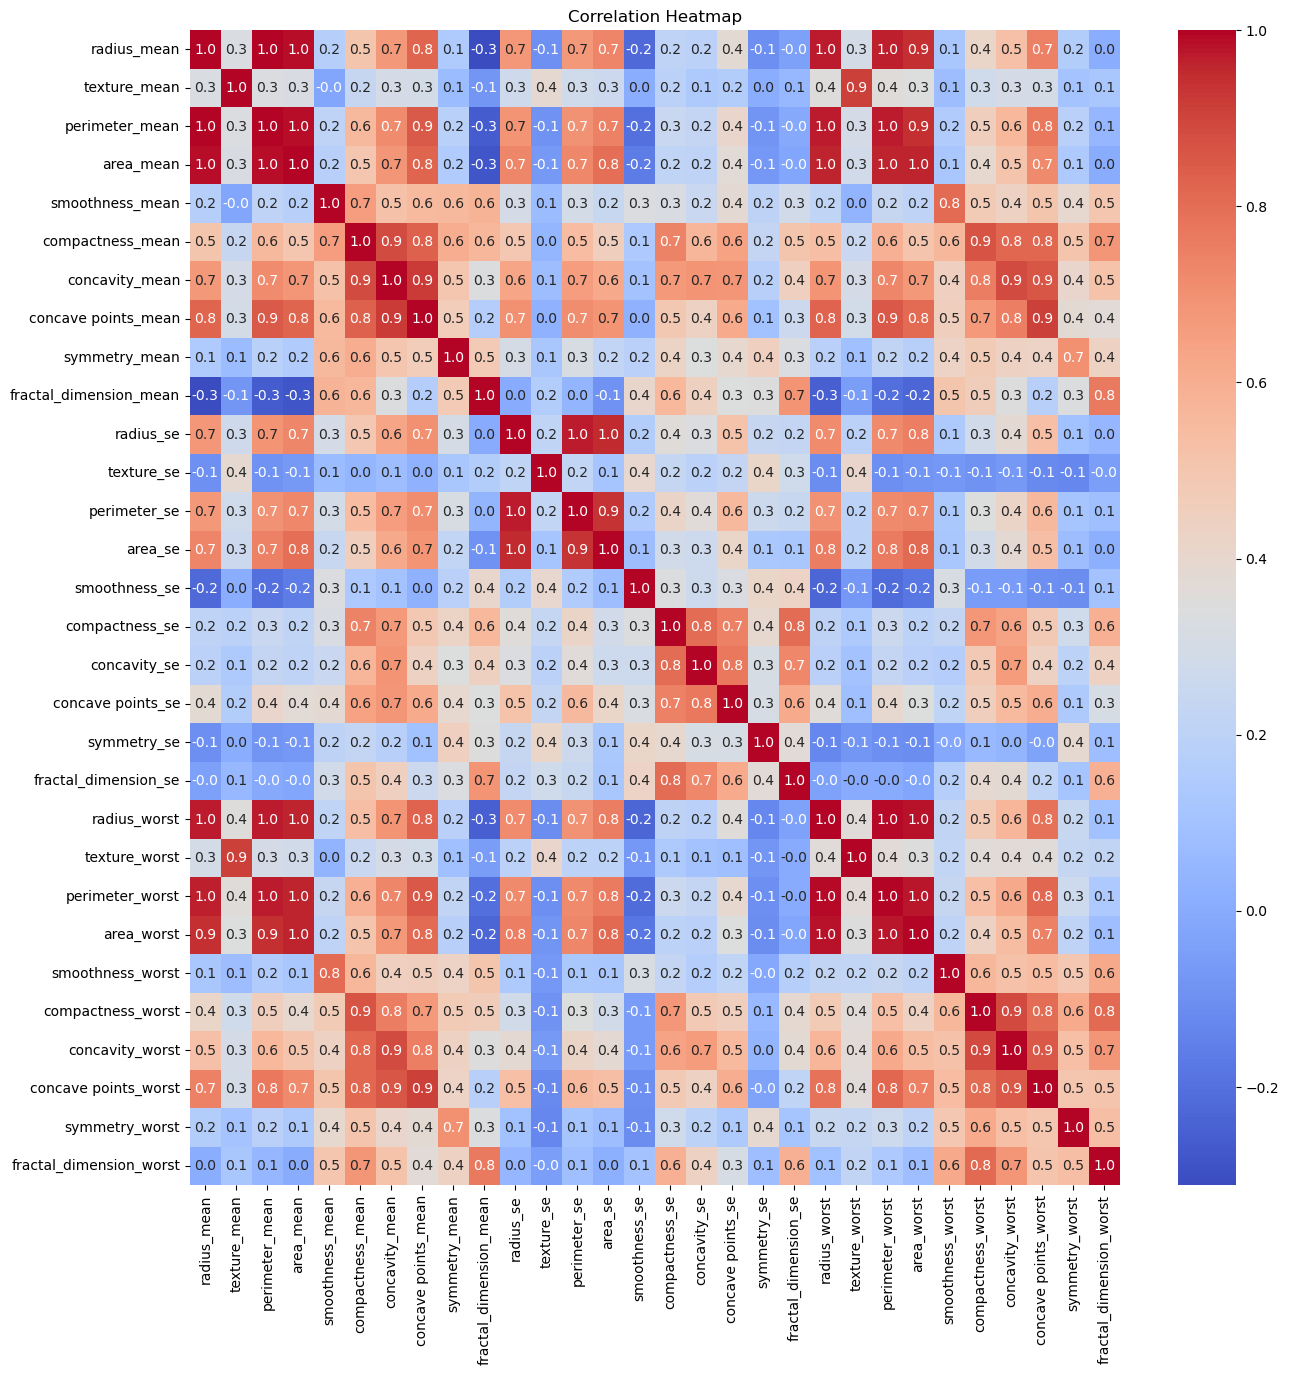

In [14]:
# Dropping the Diagnosis column(data type is Object)
BCC_df = BCC_df_raw.drop("diagnosis", axis=1)

# Creating a correlation matrix with numerc value only
correlation_matrix = BCC_df.corr()


# Creating the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

## Standardization

Here we standardize the features, combine them with the diagnosis column and then create a box plot to visualize the distribution of standardized feature values for different diagnoses (Benign or Malignant).We will use them later!

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

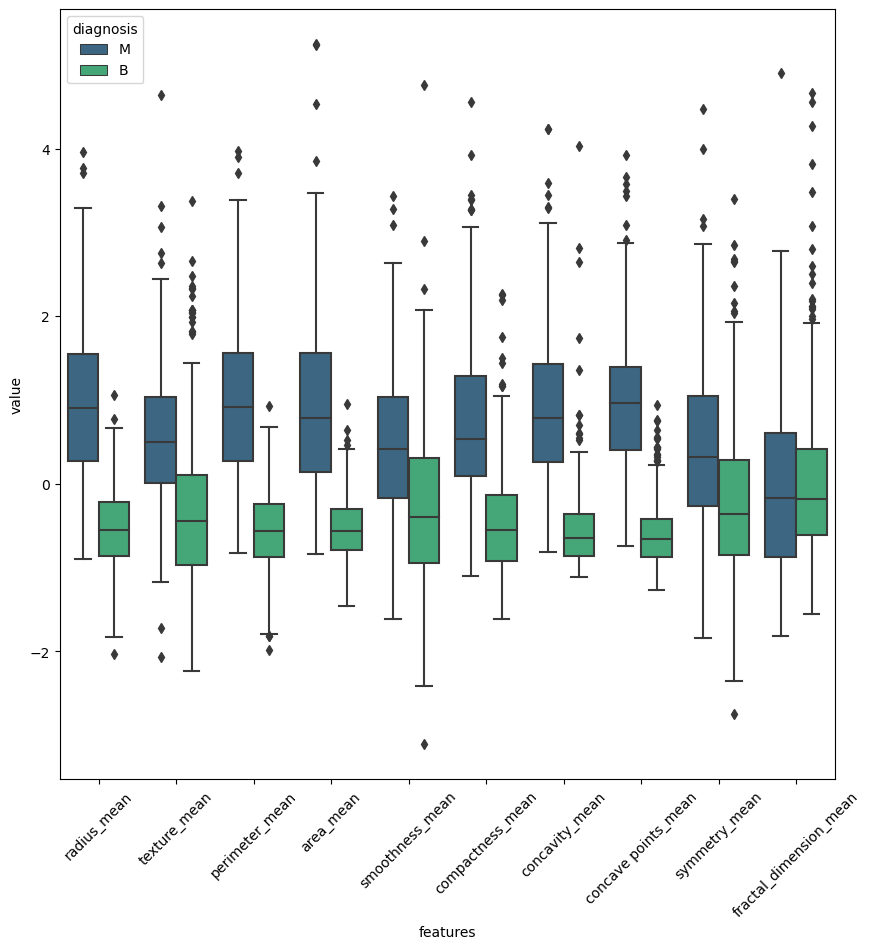

In [15]:
# creating a standard dataset without diagnosis column
BCC_df_st = BCC_df

# creating an standard diagnosis dataset containing only diagnosis column
BCC_diagnosis = BCC_df_raw.diagnosis
BCC_diagnosis_st = BCC_diagnosis


BCC_diagnosis_st = (BCC_df_st - BCC_df_st.mean()) / (BCC_df_st.std())
data_concat = pd.concat([BCC_diagnosis, BCC_diagnosis_st.iloc[:,0:10]],axis=1)
data_concat = pd.melt(data_concat, id_vars="diagnosis",
                var_name="features",
                value_name="value")

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis" , data=data_concat, palette="viridis")
plt.xticks(rotation=45)



## Data pre-processing and selection
Get the data ready for training it via the ML model and change the diagnosis data type to numeric values, since it is a requirement for the skitlearn algorithem:

In [16]:
# Enconde the diagnosis column
BCC_diagnosis = LabelEncoder().fit_transform(BCC_df_raw['diagnosis'])
BCC_diagnosis

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Define x and y for the dataset and Normalizing the data


In [17]:
# define x and y and making arrays from our data set
x = np.asarray(BCC_df)
y = np.asarray(BCC_diagnosis)


# Fit and Transform the features using the StandardScaler
x_normalized = StandardScaler().fit(x).transform(x)
print(x_normalized)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


# Data splitting
We split our dataset into train and test set:

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1368)
print("Train Set: ", x_train.shape, y_train.shape)
print("Test Set: ", x_test.shape, y_test.shape)

Train Set:  (455, 30) (455,)
Test Set:  (114, 30) (114,)


# Let's Build our Models

 ##  1- Logistic Regression Classifier

In [19]:
# Define and train a logistic regression model
# - C: Inverse of regularization strength (smaller values for stronger regularization)
# - solver: Algorithm to use for optimization (liblinear is suitable for small datasets)
# - random_state: Seed for reproducibility
LR_model = LogisticRegression(C=0.1, solver='liblinear', random_state=1368).fit(x_train, y_train)

# Predicting using the trained Logistic Regression model
y_hat = LR_model.predict(x_test)

# Store true target values
y_true = y_test

# Get class probabilities
y_hat_proba = LR_model.predict_proba(x_test)

## Cross-Validation and Metrics of LR_model:

In [20]:
# Cross-Validation Calculation
#Chooseing the number of folds (k)
num_folds = 10

# Create a cross-validation object
cross_validator = KFold(n_splits=num_folds)

# Perform cross-validation and get the accuracy scores for each fold
LR_model_accuracy_scores = cross_val_score(LR_model, x, y, cv=cross_validator, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(LR_model_accuracy_scores):
    print(f"Fold {fold_num+1} Accuracy: {accuracy:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = LR_model_accuracy_scores.mean()
print(f"Average Accuracy of LR_model: {average_accuracy:.2f}")


# Calculate evaluation metrics
accuracy_LR_model = accuracy_score(y_true, y_hat)
precision_LR_model = precision_score(y_true, y_hat)
jaccard_LR_model = jaccard_score(y_true, y_hat, pos_label=0)
recall_LR_model = recall_score(y_true, y_hat)
f1_LR_model = f1_score(y_true, y_hat)
roc_auc_LR_model = roc_auc_score(y_true, y_hat)
confusion_LR_model = confusion_matrix(y_true, y_hat)
log_loss_LR_model = log_loss(y_true, y_hat_proba)


# print the evaluation metrics
print("Accuracy of LR_model: ", accuracy_LR_model)
print("Precision of LR_model: ", precision_LR_model)
print("Jaccard Score of LR_model: ", jaccard_LR_model)
print("Recall of LR_model: ", recall_LR_model)
print("F1 Score of LR_model: ", f1_LR_model)
print("AUC-ROC Score of LR_model: ", roc_auc_LR_model)
print("Confusion Matrix of LR_model:", confusion_LR_model)
print('Log loss of LR_model: ',log_loss_LR_model)
print ("Classification Report of LR_model: \n", classification_report(y_true, y_hat))

Fold 1 Accuracy: 0.82
Fold 2 Accuracy: 0.95
Fold 3 Accuracy: 0.95
Fold 4 Accuracy: 0.95
Fold 5 Accuracy: 0.96
Fold 6 Accuracy: 0.98
Fold 7 Accuracy: 0.96
Fold 8 Accuracy: 0.96
Fold 9 Accuracy: 0.91
Fold 10 Accuracy: 0.96
Average Accuracy of LR_model: 0.94
Accuracy of LR_model:  0.9649122807017544
Precision of LR_model:  0.9487179487179487
Jaccard Score of LR_model:  0.948051948051948
Recall of LR_model:  0.9487179487179487
F1 Score of LR_model:  0.9487179487179487
AUC-ROC Score of LR_model:  0.961025641025641
Confusion Matrix of LR_model: [[73  2]
 [ 2 37]]
Log loss of LR_model:  0.10722176605659402
Classification Report of LR_model: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Confusion Matrix of LR_model
We can use confusion matrix to see which parts it got wrong in predicting.

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_true, y_hat, labels=[1,0]))

[[37  2]
 [ 2 73]]


Confusion matrix, without normalization
[[37  2]
 [ 2 73]]


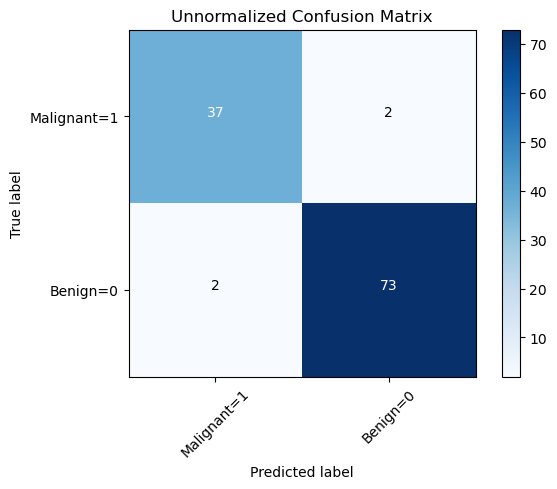

In [22]:
# Compute confusion matrix
confusionmatrix = confusion_matrix(y_true, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Malignant=1','Benign=0'],normalize= False,  title='Unnormalized Confusion Matrix')

Normalized confusion matrix
[[0.95 0.05]
 [0.03 0.97]]


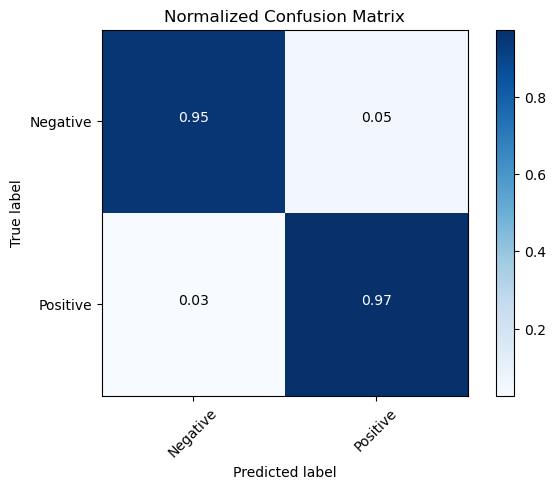

In [23]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')


## 2- Decision Tree Classifier

In [24]:
# Training a Decision Tree Classifier for classification
# I choose Decision Trees for their simplicity and ability to capture non-linear relationships in the data
DT_model = DecisionTreeClassifier(random_state=1368)
DT_model.fit(x_train, y_train)

# Predicting with the Decision Tree Classifier 
y_hat = DT_model.predict(x_test)

# Store true target values
y_true = y_test

# Get class probabilities
y_hat_proba = DT_model.predict_proba(x_test)

## Cross-Validation and Metrics of DT_model:

In [25]:
# Cross-Validation Calculation
# Chooseing the number of folds (k)
num_folds = 10

# Create a cross-validation object
cross_validator = KFold(n_splits=num_folds)

# Perform cross-validation and get the accuracy scores for each fold
DT_model_accuracy_scores = cross_val_score(DT_model, x, y, cv=cross_validator, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(DT_model_accuracy_scores):
    print(f"Fold {fold_num+1} Accuracy: {accuracy:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = DT_model_accuracy_scores.mean()
print(f"Average Accuracy of DT_model: {average_accuracy:.2f}")


# Calculate evaluation metrics
accuracy_DT_model = accuracy_score(y_true, y_hat)
precision_DT_model = precision_score(y_true, y_hat)
jaccard_DT_model = jaccard_score(y_true, y_hat, pos_label=0)
recall_DT_model = recall_score(y_true, y_hat)
f1_DT_model = f1_score(y_true, y_hat)
roc_auc_DT_model = roc_auc_score(y_true, y_hat)
confusion_DT_model = confusion_matrix(y_true, y_hat)
log_loss_DT_model = log_loss(y_true, y_hat_proba)


# print the evaluation metrics
print("Accuracy of DT_model: ", accuracy_DT_model)
print("Precision of DT_model: ", precision_DT_model)
print("Jaccard Score of DT_model: ", jaccard_DT_model)
print("Recall of DT_model: ", recall_DT_model)
print("F1 Score of DT_model: ", f1_DT_model)
print("AUC-ROC Score of DT_model: ", roc_auc_DT_model)
print("Confusion Matrix of DT_model:", confusion_DT_model)
print('Log loss of DT_model: ',log_loss_DT_model)
print ("Classification Report of DT_model: \n", classification_report(y_true, y_hat))

Fold 1 Accuracy: 0.95
Fold 2 Accuracy: 0.91
Fold 3 Accuracy: 0.88
Fold 4 Accuracy: 0.95
Fold 5 Accuracy: 0.89
Fold 6 Accuracy: 0.96
Fold 7 Accuracy: 0.89
Fold 8 Accuracy: 0.96
Fold 9 Accuracy: 0.95
Fold 10 Accuracy: 0.95
Average Accuracy of DT_model: 0.93
Accuracy of DT_model:  0.9473684210526315
Precision of DT_model:  0.9230769230769231
Jaccard Score of DT_model:  0.9230769230769231
Recall of DT_model:  0.9230769230769231
F1 Score of DT_model:  0.9230769230769231
AUC-ROC Score of DT_model:  0.9415384615384614
Confusion Matrix of DT_model: [[72  3]
 [ 3 36]]
Log loss of DT_model:  1.897034388900903
Classification Report of DT_model: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.92      0.92      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Confusion Matrix

Confusion matrix, without normalization
[[36  3]
 [ 3 72]]


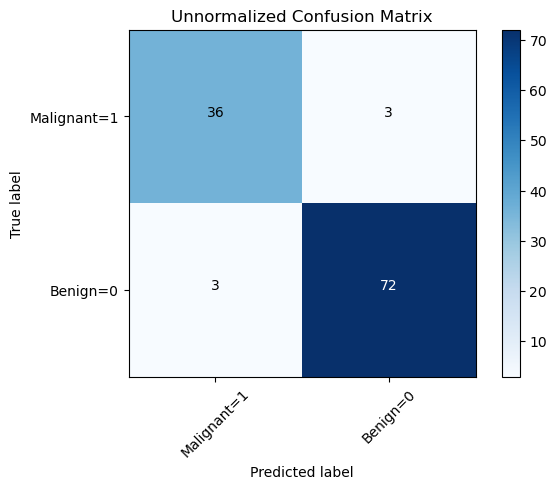

In [26]:
# Compute confusion matrix
confusionmatrix = confusion_matrix(y_true, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Malignant=1','Benign=0'],normalize= False,  title='Unnormalized Confusion Matrix')

Normalized confusion matrix
[[0.92 0.08]
 [0.04 0.96]]


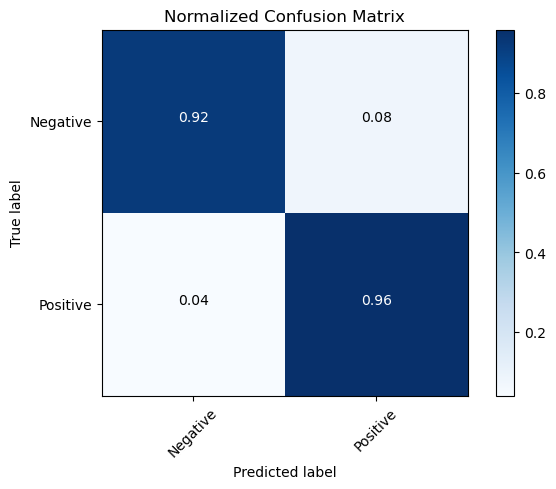

In [27]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')


## 3- Random Forest Classifier


In [28]:
# Create and train a Random Forest Classifier with 100 estimators and a fixed random seed for reproducibility
RF_model = RandomForestClassifier(n_estimators=100, random_state=1368)
RF_model.fit(x_train, y_train)

# Predicting with the Random Forest Classifier 
y_hat = RF_model.predict(x_test)

# Store true target values
y_true = y_test

# Get class probabilities
y_hat_proba = RF_model.predict_proba(x_test)

## Cross-Validation and Metrics of RF_model:

In [29]:
# Cross-Validation Calculation
# Chooseing the number of folds (k)
num_folds = 10

# Create a cross-validation object
cross_validator = KFold(n_splits=num_folds)

# Perform cross-validation and get the accuracy scores for each fold
RF_model_accuracy_scores = cross_val_score(RF_model, x, y, cv=cross_validator, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(RF_model_accuracy_scores):
    print(f"Fold {fold_num+1} Accuracy: {accuracy:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = RF_model_accuracy_scores.mean()
print(f"Average Accuracy of RF_model: {average_accuracy:.2f}")


# Calculate evaluation metrics
accuracy_RF_model = accuracy_score(y_true, y_hat)
precision_RF_model = precision_score(y_true, y_hat)
jaccard_RF_model = jaccard_score(y_true, y_hat, pos_label=0)
recall_RF_model = recall_score(y_true, y_hat)
f1_RF_model = f1_score(y_true, y_hat)
roc_auc_RF_model = roc_auc_score(y_true, y_hat)
confusion_RF_model = confusion_matrix(y_true, y_hat)
log_loss_RF_model = log_loss(y_true, y_hat_proba)


# print the evaluation metrics
print("Accuracy of RF_model: ", accuracy_RF_model)
print("Precision of RF_model: ", precision_RF_model)
print("Jaccard Score of RF_model: ", jaccard_RF_model)
print("Recall of RF_model: ", recall_RF_model)
print("F1 Score of RF_model: ", f1_RF_model)
print("AUC-ROC Score of RF_model: ", roc_auc_RF_model)
print("Confusion Matrix of RF_model:", confusion_RF_model)
print('Log loss of RF_model: ',log_loss_RF_model)
print ("Classification Report of RF_model: \n", classification_report(y_true, y_hat))

Fold 1 Accuracy: 0.95
Fold 2 Accuracy: 0.93
Fold 3 Accuracy: 0.91
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 0.96
Fold 6 Accuracy: 0.98
Fold 7 Accuracy: 0.96
Fold 8 Accuracy: 0.95
Fold 9 Accuracy: 0.96
Fold 10 Accuracy: 0.98
Average Accuracy of RF_model: 0.96
Accuracy of RF_model:  0.9824561403508771
Precision of RF_model:  1.0
Jaccard Score of RF_model:  0.974025974025974
Recall of RF_model:  0.9487179487179487
F1 Score of RF_model:  0.9736842105263158
AUC-ROC Score of RF_model:  0.9743589743589743
Confusion Matrix of RF_model: [[75  0]
 [ 2 37]]
Log loss of RF_model:  0.09926846571966914
Classification Report of RF_model: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



## Confusion Matrix of RF_model

Confusion matrix, without normalization
[[37  2]
 [ 0 75]]


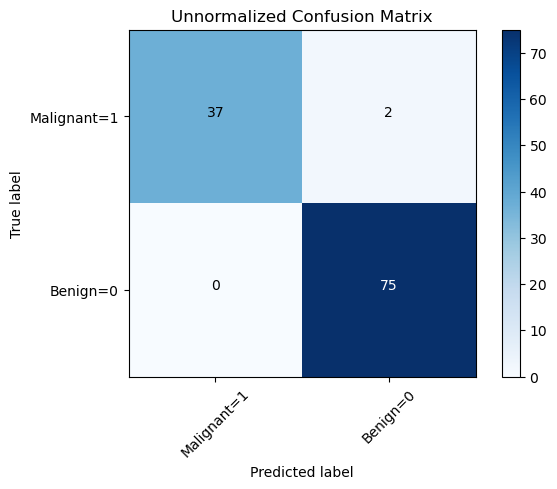

In [30]:
# Compute confusion matrix
confusionmatrix = confusion_matrix(y_true, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Malignant=1','Benign=0'],normalize= False,  title='Unnormalized Confusion Matrix')

Normalized confusion matrix
[[0.95 0.05]
 [0.   1.  ]]


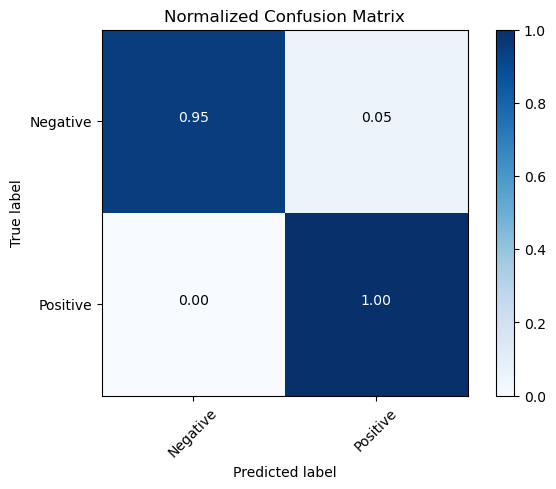

In [31]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')


## 4- K-Nearest Neighbour

In [32]:
# Split the data into training and validation sets 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=1368)


# Define a range of k values to explore
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

best_k = None
best_accuracy = 0

for k in k_values:
    # Instantiate a K-Nearest Neighbors (KNN) classifier with the current k value
    KNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    KNN.fit(x_train, y_train)
    
    # Use the validation set to evaluate model performance
    y_pred = KNN.predict(x_validation)
    accuracy = accuracy_score(y_validation, y_pred)
    
    # Check if this k value gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")


Best k value: 13


In [33]:
# Instantiate a K-Nearest Neighbors (KNN) classifier with 13 neighbors.
KNN_model = KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(x_train, y_train)

# Predicting with the KNN Classifier 
y_hat = KNN_model.predict(x_test)

# Store true target values
y_true = y_test

# Get class probabilities
y_hat_proba = KNN_model.predict_proba(x_test)

## Cross-Validation and Metrics of KNN_model:

In [34]:
# Cross-Validation Calculation
# Chooseing the number of folds (k)
num_folds = 10

# Create a cross-validation object
cross_validator = KFold(n_splits=num_folds)

# Perform cross-validation and get the accuracy scores for each fold
KNN_model_accuracy_scores = cross_val_score(KNN_model, x, y, cv=cross_validator, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(KNN_model_accuracy_scores):
    print(f"Fold {fold_num+1} Accuracy: {accuracy:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = KNN_model_accuracy_scores.mean()
print(f"Average Accuracy of KNN_model: {average_accuracy:.2f}")


# Calculate evaluation metrics
accuracy_KNN_model = accuracy_score(y_true, y_hat)
precision_KNN_model = precision_score(y_true, y_hat)
jaccard_KNN_model = jaccard_score(y_true, y_hat, pos_label=0)
recall_KNN_model = recall_score(y_true, y_hat)
f1_KNN_model = f1_score(y_true, y_hat)
roc_auc_KNN_model = roc_auc_score(y_true, y_hat)
confusion_KNN_model = confusion_matrix(y_true, y_hat)
log_loss_KNN_model = log_loss(y_true, y_hat_proba)


# print the evaluation metrics
print("Accuracy of KNN_model: ", accuracy_KNN_model)
print("Precision of KNN_model: ", precision_KNN_model)
print("Jaccard Score of KNN_model: ", jaccard_KNN_model)
print("Recall of KNN_model: ", recall_KNN_model)
print("F1 Score of KNN_model: ", f1_KNN_model)
print("AUC-ROC Score of KNN_model: ", roc_auc_KNN_model)
print("Confusion Matrix of KNN_model:", confusion_KNN_model)
print('Log loss of KNN_model: ',log_loss_KNN_model)
print ("Classification Report of KNN_model: \n", classification_report(y_true, y_hat))

Fold 1 Accuracy: 0.77
Fold 2 Accuracy: 0.93
Fold 3 Accuracy: 0.93
Fold 4 Accuracy: 0.91
Fold 5 Accuracy: 0.98
Fold 6 Accuracy: 0.98
Fold 7 Accuracy: 0.95
Fold 8 Accuracy: 0.96
Fold 9 Accuracy: 0.91
Fold 10 Accuracy: 0.96
Average Accuracy of KNN_model: 0.93
Accuracy of KNN_model:  0.956140350877193
Precision of KNN_model:  0.9473684210526315
Jaccard Score of KNN_model:  0.9358974358974359
Recall of KNN_model:  0.9230769230769231
F1 Score of KNN_model:  0.935064935064935
AUC-ROC Score of KNN_model:  0.9482051282051284
Confusion Matrix of KNN_model: [[73  2]
 [ 3 36]]
Log loss of KNN_model:  0.41587596055235576
Classification Report of KNN_model: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Confusion Matrix of KNN_model

Confusion matrix, without normalization
[[36  3]
 [ 2 73]]


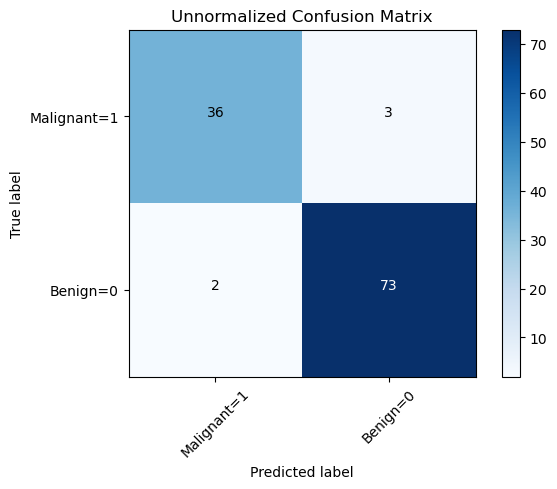

In [35]:
# Compute confusion matrix
confusionmatrix = confusion_matrix(y_true, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Malignant=1','Benign=0'],normalize= False,  title='Unnormalized Confusion Matrix')

Normalized confusion matrix
[[0.92 0.08]
 [0.03 0.97]]


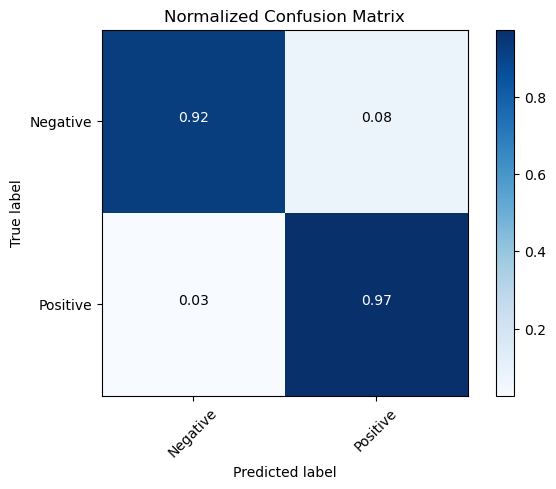

In [36]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')


## 4- Naive Bayes Model

In [50]:
# Create a Naive Bayes classifier
NB_model = GaussianNB()  

# Train the classifier  
NB_model.fit(x_train, y_train)

# Make predictions on the test data
y_hat = NB_model.predict(x_test)

# Store true target values
y_true = y_test

# Get class probabilities
y_hat_proba = NB_model.predict_proba(x_test)

## Cross-Validation and Metrics of NB_model:

In [51]:
# Cross-Validation Calculation
# Chooseing the number of folds (k)
num_folds = 10

# Create a cross-validation object
cross_validator = KFold(n_splits=num_folds)

# Perform cross-validation and get the accuracy scores for each fold
NB_model_accuracy_scores = cross_val_score(NB_model, x, y, cv=cross_validator, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(NB_model_accuracy_scores):
    print(f"Fold {fold_num+1} Accuracy: {accuracy:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = NB_model_accuracy_scores.mean()
print(f"Average Accuracy of NB_model: {average_accuracy:.2f}")


# Calculate evaluation metrics
accuracy_NB_model = accuracy_score(y_true, y_hat)
precision_NB_model = precision_score(y_true, y_hat)
jaccard_NB_model = jaccard_score(y_true, y_hat, pos_label=0)
recall_NB_model = recall_score(y_true, y_hat)
f1_NB_model = f1_score(y_true, y_hat)
roc_auc_NB_model = roc_auc_score(y_true, y_hat)
confusion_NB_model = confusion_matrix(y_true, y_hat)
log_loss_NB_model = log_loss(y_true, y_hat_proba)


# print the evaluation metrics
print("Accuracy of NB_model: ", accuracy_NB_model)
print("Precision of NB_model: ", precision_NB_model)
print("Jaccard Score of NB_model: ", jaccard_NB_model)
print("Recall of NB_model: ", recall_NB_model)
print("F1 Score of NB_model: ", f1_NB_model)
print("AUC-ROC Score of NB_model: ", roc_auc_NB_model)
print("Confusion Matrix of NB_model:", confusion_NB_model)
print('Log loss of NB_model: ',log_loss_NB_model)
print ("Classification Report of NB_model: \n", classification_report(y_true, y_hat))

Fold 1 Accuracy: 0.89
Fold 2 Accuracy: 0.86
Fold 3 Accuracy: 0.91
Fold 4 Accuracy: 0.93
Fold 5 Accuracy: 0.95
Fold 6 Accuracy: 0.96
Fold 7 Accuracy: 0.98
Fold 8 Accuracy: 0.96
Fold 9 Accuracy: 0.95
Fold 10 Accuracy: 0.96
Average Accuracy of NB_model: 0.94
Accuracy of NB_model:  0.9473684210526315
Precision of NB_model:  0.9024390243902439
Jaccard Score of NB_model:  0.922077922077922
Recall of NB_model:  0.9487179487179487
F1 Score of NB_model:  0.9249999999999999
AUC-ROC Score of NB_model:  0.9476923076923077
Confusion Matrix of NB_model: [[71  4]
 [ 2 37]]
Log loss of NB_model:  0.5231018652942414
Classification Report of NB_model: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.90      0.95      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



## Confusion Matrix of NB_model

Confusion matrix, without normalization
[[37  2]
 [ 4 71]]


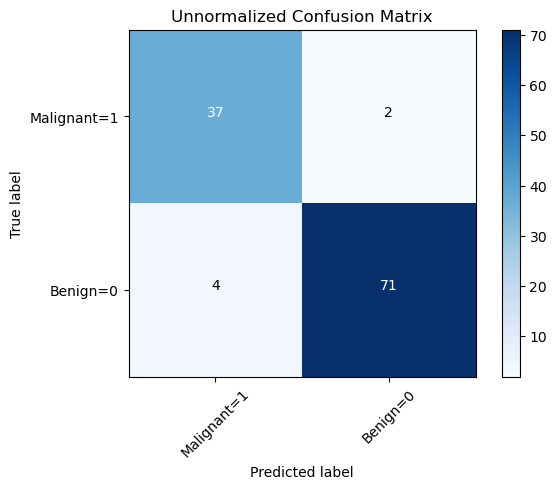

In [53]:
# Compute confusion matrix
confusionmatrix = confusion_matrix(y_true, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Malignant=1','Benign=0'],normalize= False,  title='Unnormalized Confusion Matrix')

Normalized confusion matrix
[[0.95 0.05]
 [0.05 0.95]]


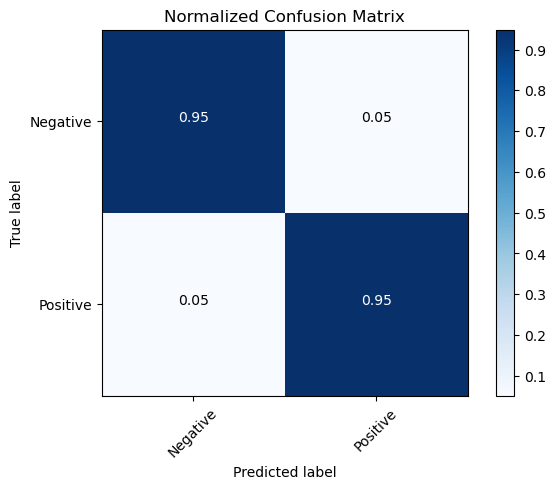

In [54]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')


## 5- Support Vector Machine

In [58]:
# Creat a SVM model
SVM_model = SVC(probability=True)

# Training the model 
SVM_model.fit(x_train, y_train)

# Predicting with the Decision Tree Classifier 
y_hat = SVM_model.predict(x_test)

# Store true target values
y_true = y_test

# Get class probabilities
y_hat_proba = SVM_model.predict_proba(x_test)

## Cross-Validation and Metrics of SVM_model:

In [59]:
# Cross-Validation Calculation
# Chooseing the number of folds (k)
num_folds = 10

# Create a cross-validation object
cross_validator = KFold(n_splits=num_folds)

# Perform cross-validation and get the accuracy scores for each fold
SVM_model_accuracy_scores = cross_val_score(SVM_model, x, y, cv=cross_validator, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(SVM_model_accuracy_scores):
    print(f"Fold {fold_num+1} Accuracy: {accuracy:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = SVM_model_accuracy_scores.mean()
print(f"Average Accuracy of SVM_model: {average_accuracy:.2f}")


# Calculate evaluation metrics
accuracy_SVM_model = accuracy_score(y_true, y_hat)
precision_SVM_model = precision_score(y_true, y_hat)
jaccard_SVM_model = jaccard_score(y_true, y_hat, pos_label=0)
recall_SVM_model = recall_score(y_true, y_hat)
f1_SVM_model = f1_score(y_true, y_hat)
roc_auc_SVM_model = roc_auc_score(y_true, y_hat)
confusion_SVM_model = confusion_matrix(y_true, y_hat)
log_loss_SVM_model = log_loss(y_true, y_hat_proba)


# print the evaluation metrics
print("Accuracy of SVM_model: ", accuracy_SVM_model)
print("Precision of SVM_model: ", precision_SVM_model)
print("Jaccard Score of SVM_model: ", jaccard_SVM_model)
print("Recall of SVM_model: ", recall_SVM_model)
print("F1 Score of SVM_model: ", f1_SVM_model)
print("AUC-ROC Score of SVMT_model: ", roc_auc_SVM_model)
print("Confusion Matrix of SVM_model:", confusion_SVM_model)
print('Log loss of SVM_model: ',log_loss_SVM_model)
print ("Classification Report of SVM_model: \n", classification_report(y_true, y_hat))

Fold 1 Accuracy: 0.70
Fold 2 Accuracy: 0.91
Fold 3 Accuracy: 0.91
Fold 4 Accuracy: 0.89
Fold 5 Accuracy: 0.96
Fold 6 Accuracy: 0.98
Fold 7 Accuracy: 0.95
Fold 8 Accuracy: 0.95
Fold 9 Accuracy: 0.91
Fold 10 Accuracy: 0.98
Average Accuracy of SVM_model: 0.92
Accuracy of SVM_model:  0.956140350877193
Precision of SVM_model:  1.0
Jaccard Score of SVM_model:  0.9375
Recall of SVM_model:  0.8717948717948718
F1 Score of SVM_model:  0.9315068493150686
AUC-ROC Score of SVMT_model:  0.9358974358974359
Confusion Matrix of SVM_model: [[75  0]
 [ 5 34]]
Log loss of SVM_model:  0.15061284551048548
Classification Report of SVM_model: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.87      0.93        39

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## Confusion Matrix of SVM_model

Confusion matrix, without normalization
[[34  5]
 [ 0 75]]


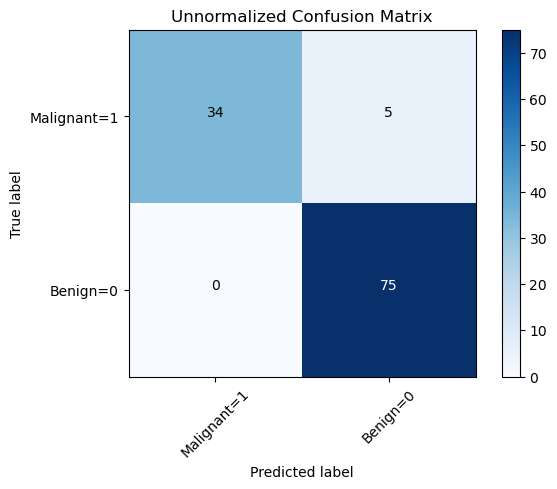

In [60]:
# Compute confusion matrix
confusionmatrix = confusion_matrix(y_true, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Malignant=1','Benign=0'],normalize= False,  title='Unnormalized Confusion Matrix')

Normalized confusion matrix
[[0.87 0.13]
 [0.   1.  ]]


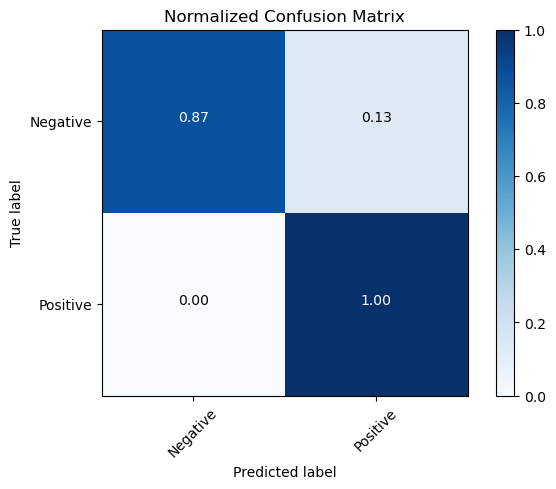

In [61]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')


## 6- XGBoost

In [62]:
# Create a XGBBoost Classifier
XGB_model = XGBClassifier()

# Train the data
XGB_model.fit(x_train, y_train)

# Predicting with the Decision Tree Classifier 
y_hat = XGB_model.predict(x_test)

# Store true target values
y_true = y_test

# Get class probabilities
y_hat_proba = XGB_model.predict_proba(x_test)

## Cross-Validation and Metrics of XGB_model:

In [64]:
# Cross-Validation Calculation
# Chooseing the number of folds (k)
num_folds = 10

# Create a cross-validation object
cross_validator = KFold(n_splits=num_folds)

# Perform cross-validation and get the accuracy scores for each fold
XGB_model_accuracy_scores = cross_val_score(XGB_model, x, y, cv=cross_validator, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(XGB_model_accuracy_scores):
    print(f"Fold {fold_num+1} Accuracy: {accuracy:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = XGB_model_accuracy_scores.mean()
print(f"Average Accuracy of XGB_model: {average_accuracy:.2f}")


# Calculate evaluation metrics
accuracy_XGB_model = accuracy_score(y_true, y_hat)
precision_XGB_model = precision_score(y_true, y_hat)
jaccard_XGB_model = jaccard_score(y_true, y_hat, pos_label=0)
recall_XGB_model = recall_score(y_true, y_hat)
f1_XGB_model = f1_score(y_true, y_hat)
roc_auc_XGB_model = roc_auc_score(y_true, y_hat)
confusion_XGB_model = confusion_matrix(y_true, y_hat)
log_loss_XGB_model = log_loss(y_true, y_hat_proba)


# print the evaluation metrics
print("Accuracy of XGB_model: ", accuracy_XGB_model)
print("Precision of XGB_model: ", precision_XGB_model)
print("Jaccard Score of XGB_model: ", jaccard_XGB_model)
print("Recall of XGB_model: ", recall_XGB_model)
print("F1 Score of XGB_model: ", f1_XGB_model)
print("AUC-ROC Score of XGB_model: ", roc_auc_XGB_model)
print("Confusion Matrix of XGB_model:", confusion_XGB_model)
print('Log loss of XGB_model: ',log_loss_XGB_model)
print ("Classification Report of XGB_model: \n", classification_report(y_true, y_hat))

Fold 1 Accuracy: 0.96
Fold 2 Accuracy: 0.95
Fold 3 Accuracy: 0.93
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 0.98
Fold 6 Accuracy: 0.98
Fold 7 Accuracy: 0.98
Fold 8 Accuracy: 1.00
Fold 9 Accuracy: 0.98
Fold 10 Accuracy: 1.00
Average Accuracy of XGB_model: 0.98
Accuracy of XGB_model:  0.9736842105263158
Precision of XGB_model:  1.0
Jaccard Score of XGB_model:  0.9615384615384616
Recall of XGB_model:  0.9230769230769231
F1 Score of XGB_model:  0.9600000000000001
AUC-ROC Score of XGB_model:  0.9615384615384616
Confusion Matrix of XGB_model: [[75  0]
 [ 3 36]]
Log loss of XGB_model:  0.08742198963933527
Classification Report of XGB_model: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



## Confusion Matrix of XGB_model

Confusion matrix, without normalization
[[36  3]
 [ 0 75]]


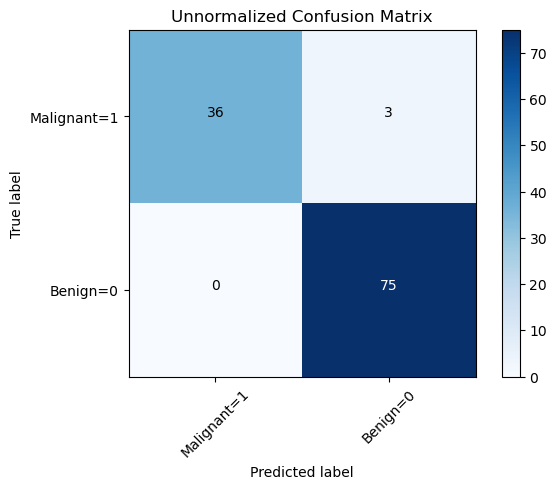

In [65]:
# Compute confusion matrix
confusionmatrix = confusion_matrix(y_true, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Malignant=1','Benign=0'],normalize= False,  title='Unnormalized Confusion Matrix')

Normalized confusion matrix
[[0.92 0.08]
 [0.   1.  ]]


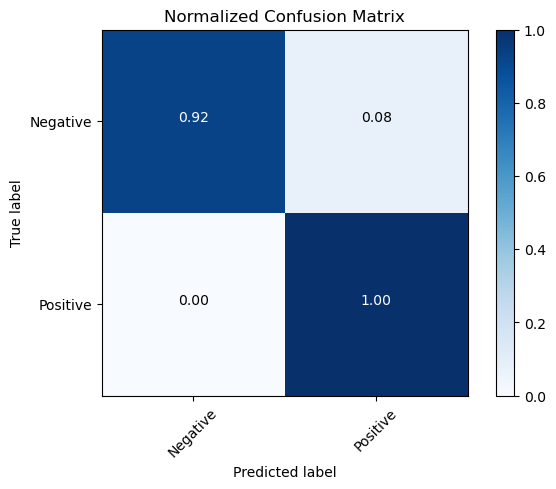

In [66]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusionmatrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')


## Model Evaluation

In [104]:
metrics_df = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest','K-Nearest Neighbour','Naive Bayes','Support Vector Machine', 'XGB Classifier'], 
                           'Accuracy': [accuracy_LR_model*100,accuracy_DT_model*100,accuracy_RF_model*100, accuracy_KNN_model*100,accuracy_NB_model*100,accuracy_SVM_model*100,accuracy_XGB_model*100],
                           'Precision': [precision_LR_model*100,precision_DT_model*100,precision_RF_model*100, precision_KNN_model*100,precision_NB_model*100,precision_SVM_model*100,precision_XGB_model*100],
                           'Jaccard Index': [jaccard_LR_model*100,jaccard_DT_model*100,jaccard_RF_model*100, jaccard_KNN_model*100,jaccard_NB_model*100,jaccard_SVM_model*100,jaccard_XGB_model*100] ,
                           'Recall': [recall_LR_model*100,recall_DT_model*100,recall_RF_model*100, recall_KNN_model*100,recall_NB_model*100,recall_SVM_model*100,recall_XGB_model*100],
                           'F1-Score':[f1_LR_model*100,f1_DT_model*100,f1_RF_model*100, f1_KNN_model*100,f1_NB_model*100,f1_SVM_model*100,f1_XGB_model*100] ,
                           'ROC-AUC Score':[roc_auc_LR_model*100,roc_auc_DT_model*100,roc_auc_RF_model*100, roc_auc_KNN_model*100,roc_auc_NB_model*100,roc_auc_SVM_model*100,roc_auc_XGB_model*100]})

# List of metrics you want to sort by
metrics_to_sort = ['Accuracy', 'Precision', 'Jaccard Index', 'Recall', 'F1-Score', 'ROC-AUC Score']

for metric in metrics_to_sort:
    # Sort the DataFrame by the current metric in descending order
    sorted_df = metrics_df.sort_values(by=metric, ascending=False)
    
    # Print the sorted column (the specified metric)
    print(f"Sorted by {metric}:")
    print(sorted_df[['Model', metric]], "\n")

Sorted by Accuracy:
                    Model   Accuracy
2           Random Forest  98.245614
6          XGB Classifier  97.368421
0     Logistic Regression  96.491228
3     K-Nearest Neighbour  95.614035
5  Support Vector Machine  95.614035
1           Decision Tree  94.736842
4             Naive Bayes  94.736842 

Sorted by Precision:
                    Model   Precision
2           Random Forest  100.000000
5  Support Vector Machine  100.000000
6          XGB Classifier  100.000000
0     Logistic Regression   94.871795
3     K-Nearest Neighbour   94.736842
1           Decision Tree   92.307692
4             Naive Bayes   90.243902 

Sorted by Jaccard Index:
                    Model  Jaccard Index
2           Random Forest      97.402597
6          XGB Classifier      96.153846
0     Logistic Regression      94.805195
5  Support Vector Machine      93.750000
3     K-Nearest Neighbour      93.589744
1           Decision Tree      92.307692
4             Naive Bayes      92.207792 



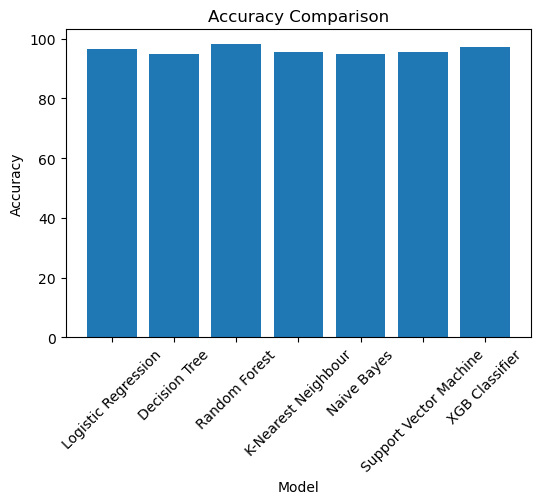

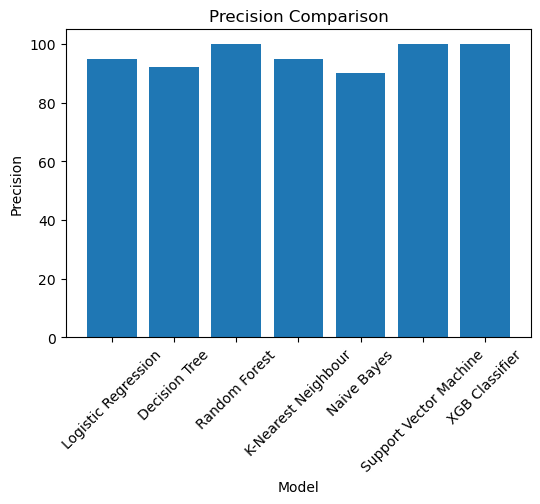

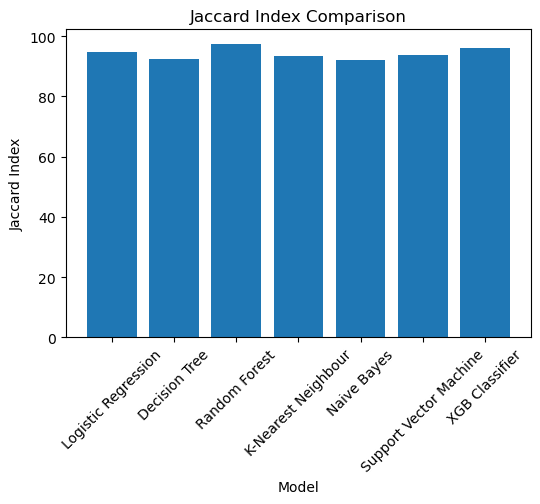

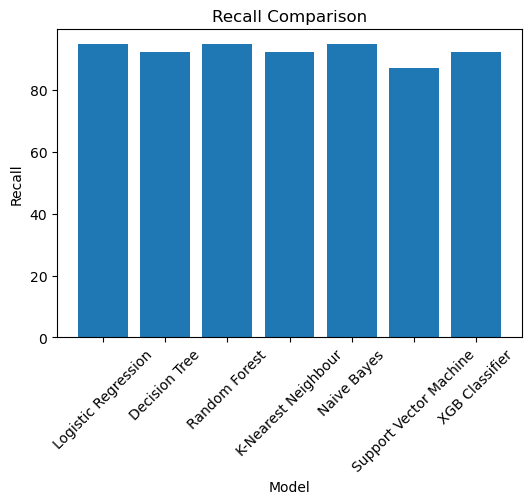

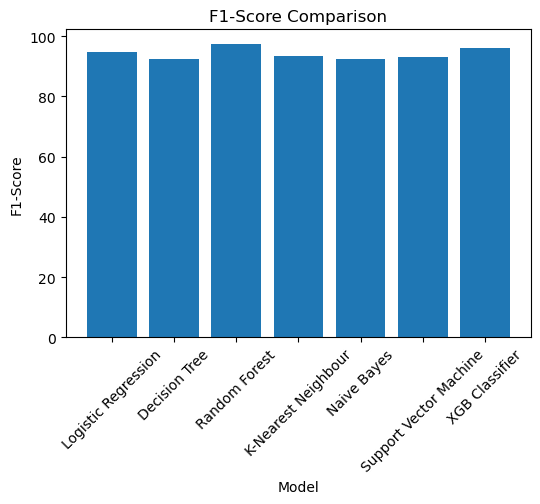

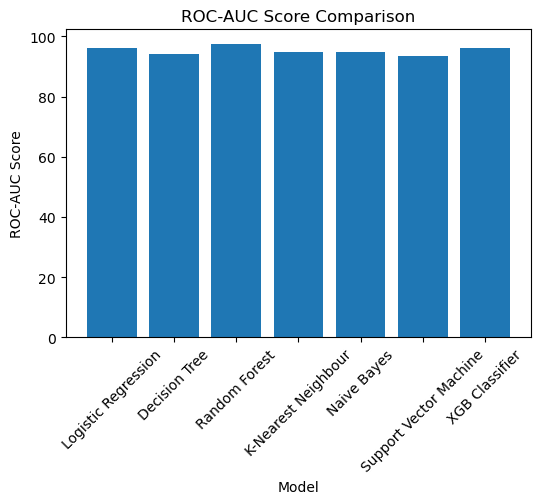

In [103]:
# Visulization
# List of metrics for the plot (excluding the 'Model' column)
metrics_to_plot = ['Accuracy', 'Precision', 'Jaccard Index', 'Recall', 'F1-Score', 'ROC-AUC Score']
    
    
# Create separate figures and axes for each metric
for metric in metrics_to_plot:
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Create a bar chart for the current metric
    ax.bar(metrics_df['Model'], metrics_df[metric])
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.tick_params(axis='x', rotation=45)
    
    # Show the plot
    plt.show()


## Conclusion
In short, we could conclude that the diagnosis of breast cancer can best be made with the random forest algorithm, which makes accurate predictions with a rate of 98.2 percent.